<a href="https://colab.research.google.com/github/huangw195/voicecall/blob/main/Voice_Call_Quality_Customer_Experience_with_States.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reading the data:

In [ ]:
import warnings

In [ ]:
#import all libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving datafile.xlsx to datafile.xlsx


In [ ]:
import pandas as pd
from scipy.io import arff
import numpy as np
df=pd.read_excel('datafile.xlsx')
print(df.dtypes)

Operator               object
In Out Travelling      object
Network Type           object
Rating                  int64
Call Drop Category     object
Latitude              float64
Longitude             float64
State Name             object
dtype: object


In [ ]:
df.head()

,Operator,In Out Travelling,Network Type,Rating,Call Drop Category,Latitude,Longitude,State Name
0,Airtel,Indoor,4G,1,Poor Voice Quality,-1.000000,-1.000000,NaN
1,Airtel,Outdoor,4G,1,Call Dropped,-1.000000,-1.000000,NaN
2,Airtel,Travelling,4G,1,Call Dropped,-1.000000,-1.000000,NaN
3,RJio,Indoor,4G,5,Satisfactory,19.871658,75.542397,Maharashtra
4,BSNL,Indoor,3G,1,Call Dropped,16.437764,80.997508,Andhra Pradesh


In [ ]:
df.shape

(9092, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9092 entries, 0 to 9091
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Operator            9092 non-null   object 
 1   In Out Travelling   9092 non-null   object 
 2   Network Type        9092 non-null   object 
 3   Rating              9092 non-null   int64  
 4   Call Drop Category  9092 non-null   object 
 5   Latitude            9092 non-null   float64
 6   Longitude           9092 non-null   float64
 7   State Name          8824 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 568.4+ KB


In [ ]:
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.9,0.99])

,Rating,Latitude,Longitude
count,9092.000000,9092.000000,9092.000000
mean,3.381874,20.253772,76.980535
std,1.552163,6.507887,14.577352
min,1.000000,-1.000000,-1.000000
10%,1.000000,12.940380,72.831904
25%,2.000000,17.066365,75.399569
50%,4.000000,21.046682,77.650621
75%,5.000000,24.088974,82.706647
90%,5.000000,28.580122,88.336735
99%,5.000000,31.630739,89.460648


Data Cleaning:

In [ ]:
df.isnull().sum()

Operator                0
In Out Travelling       0
Network Type            0
Rating                  0
Call Drop Category      0
Latitude                0
Longitude               0
State Name            268
dtype: int64

In [ ]:
# Remove NAs
df=df.dropna()

In [ ]:
# rechecking to make sure no more NAs in the dataframe
df.isnull().sum()

Operator              0
In Out Travelling     0
Network Type          0
Rating                0
Call Drop Category    0
Latitude              0
Longitude             0
State Name            0
dtype: int64

In [ ]:
df['Call Drop Category'].value_counts()

Satisfactory          5854
Poor Voice Quality    2057
Call Dropped           913
Name: Call Drop Category, dtype: int64

In [ ]:
df['Operator'].value_counts()

Airtel      3179
RJio        2755
Vodafone    1353
BSNL         829
Idea         604
MTNL         104
Name: Operator, dtype: int64

In [ ]:
df['In Out Travelling'].value_counts()

Indoor        6386
Outdoor       1972
Travelling     466
Name: In Out Travelling, dtype: int64

In [ ]:
df['Network Type'].value_counts()

4G         6194
Unknown    1462
3G          804
2G          364
Name: Network Type, dtype: int64

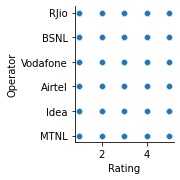

In [ ]:
sns.pairplot(y_vars='Operator',x_vars='Rating',data=df)

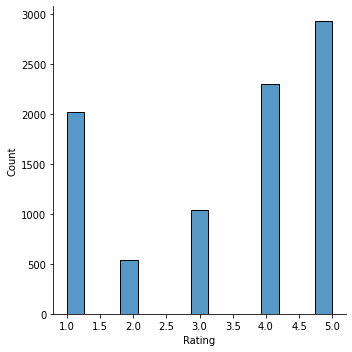

In [ ]:
# distribution of rating
sns.displot(df['Rating'])
plt.show()

We have almost looked into most of the column individually. Now let us explore data visulaization to look for any patterns.



**Data Visulaization:**

In [ ]:
df_numeric=df.select_dtypes(include=['int64','float64'])
df_numeric.head()

,Rating,Latitude,Longitude
3,5,19.871658,75.542397
4,1,16.437764,80.997508
5,1,13.049329,80.221406
8,5,13.049329,80.221406
9,1,30.694757,77.428422


<Figure size 2160x2160 with 0 Axes>

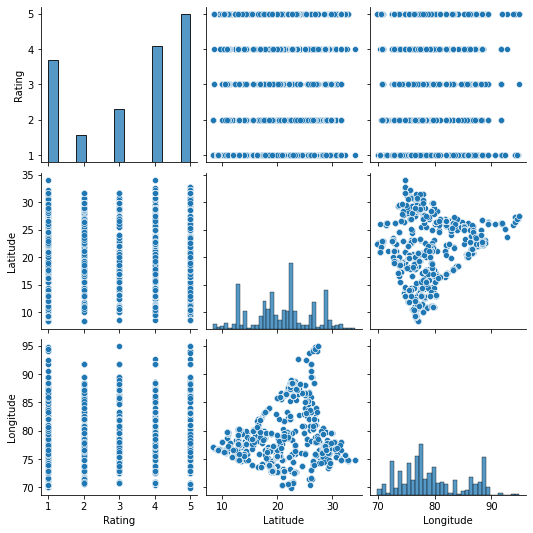

In [ ]:
plt.figure(figsize=(30,30))
sns.pairplot(df_numeric)
plt.show()

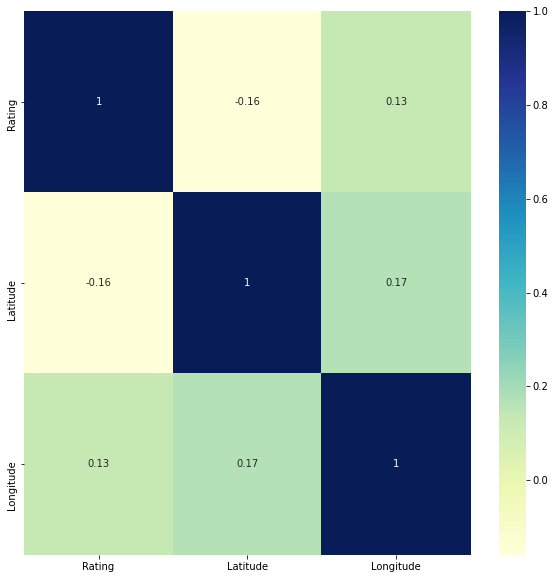

In [ ]:
# correlation
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True ,cmap = 'YlGnBu')
plt.show()

In [ ]:
categorical_cols = df.select_dtypes(include = ['object'])
categorical_cols.head()

,Operator,In Out Travelling,Network Type,Call Drop Category,State Name
3,RJio,Indoor,4G,Satisfactory,Maharashtra
4,BSNL,Indoor,3G,Call Dropped,Andhra Pradesh
5,Vodafone,Indoor,4G,Poor Voice Quality,Tamil Nadu
8,Vodafone,Indoor,4G,Satisfactory,Tamil Nadu
9,RJio,Indoor,4G,Call Dropped,Himachal Pradesh


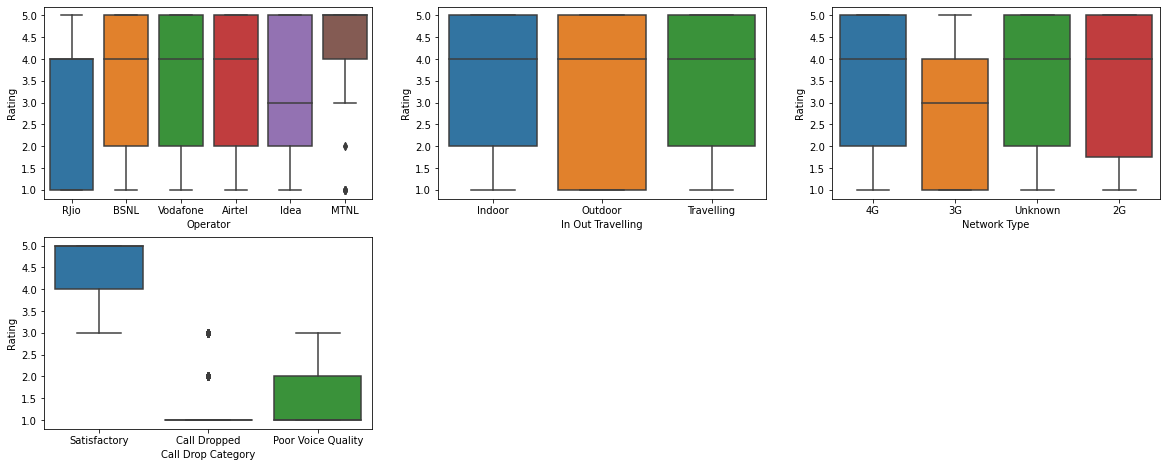

In [ ]:
plt.figure(figsize = (20,12))
plt.subplot(3,3,1)
sns.boxplot(x = 'Operator', y = 'Rating', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'In Out Travelling', y = 'Rating', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'Network Type', y = 'Rating', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'Call Drop Category', y = 'Rating', data = df)

1. From the price boxplot it is clear that Network Type with 4G in the dataset has the highest rating.
2. Call Dropped has the lowest Rating compared to other Call Drop Categories.
3. The median rating of Indoor is the same as that of Outdoor.
4. Indoor and Outdoor are almost equally rated. There are however some outliers.
 



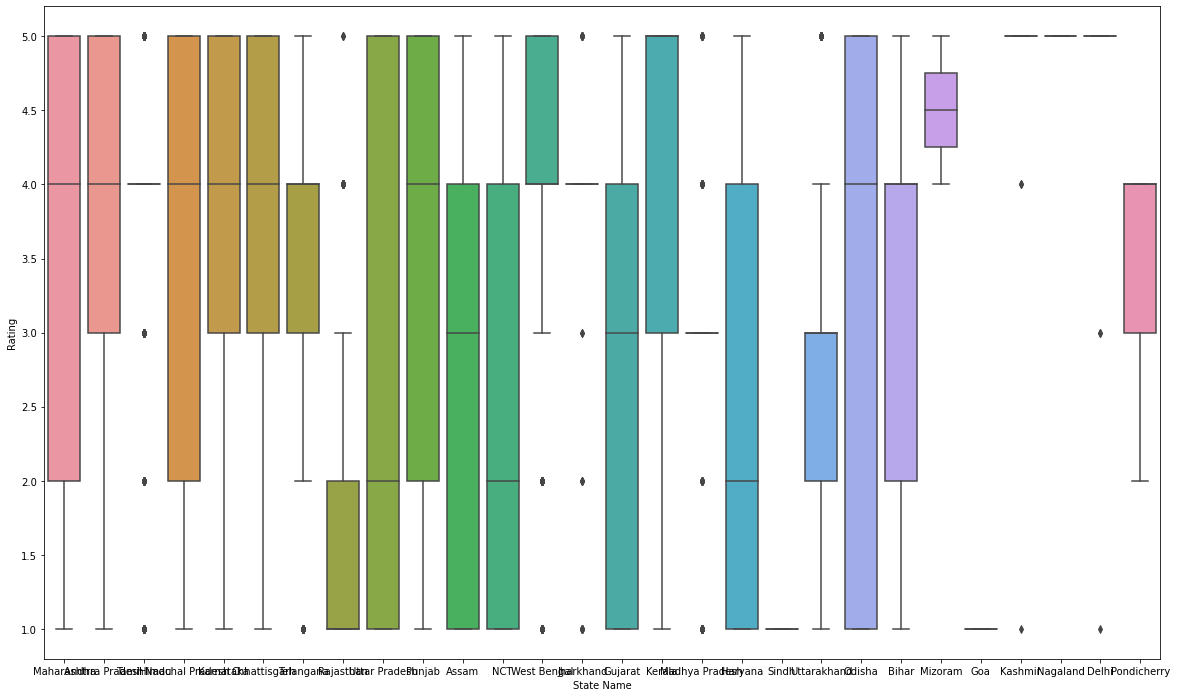

In [ ]:
plt.figure(figsize = (20,12))
sns.boxplot(x = 'State Name', y = 'Rating', data = df)

1. Mizoram state has the highest median rating in the dataset. 

**Data preparation:**


In [ ]:
#creating dummies
df_dummies = pd.get_dummies(categorical_cols, drop_first = True)
df_dummies.head()

,Operator_BSNL,Operator_Idea,Operator_MTNL,Operator_RJio,Operator_Vodafone,In Out Travelling_Outdoor,In Out Travelling_Travelling,Network Type_3G,Network Type_4G,Network Type_Unknown,Call Drop Category_Poor Voice Quality,Call Drop Category_Satisfactory,State Name_Assam,State Name_Bihar,State Name_Chhattisgarh,State Name_Delhi,State Name_Goa,State Name_Gujarat,State Name_Haryana,State Name_Himachal Pradesh,State Name_Jharkhand,State Name_Karnataka,State Name_Kashmir,State Name_Kerala,State Name_Madhya Pradesh,State Name_Maharashtra,State Name_Mizoram,State Name_NCT,State Name_Nagaland,State Name_Odisha,State Name_Pondicherry,State Name_Punjab,State Name_Rajasthan,State Name_Sindh,State Name_Tamil Nadu,State Name_Telangana,State Name_Uttar Pradesh,State Name_Uttarakhand,State Name_West Bengal
3,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
rating_df=pd.concat([df,df_dummies],axis=1)

In [ ]:
rating_df=rating_df.drop(['Operator','In Out Travelling','Network Type','Call Drop Category','State Name'],axis=1)

In [ ]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8824 entries, 3 to 9091
Data columns (total 42 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Rating                                 8824 non-null   int64  
 1   Latitude                               8824 non-null   float64
 2   Longitude                              8824 non-null   float64
 3   Operator_BSNL                          8824 non-null   uint8  
 4   Operator_Idea                          8824 non-null   uint8  
 5   Operator_MTNL                          8824 non-null   uint8  
 6   Operator_RJio                          8824 non-null   uint8  
 7   Operator_Vodafone                      8824 non-null   uint8  
 8   In Out Travelling_Outdoor              8824 non-null   uint8  
 9   In Out Travelling_Travelling           8824 non-null   uint8  
 10  Network Type_3G                        8824 non-null   uint8  
 11  Netw

In [ ]:
rating_df

,Rating,Latitude,Longitude,Operator_BSNL,Operator_Idea,Operator_MTNL,Operator_RJio,Operator_Vodafone,In Out Travelling_Outdoor,In Out Travelling_Travelling,Network Type_3G,Network Type_4G,Network Type_Unknown,Call Drop Category_Poor Voice Quality,Call Drop Category_Satisfactory,State Name_Assam,State Name_Bihar,State Name_Chhattisgarh,State Name_Delhi,State Name_Goa,State Name_Gujarat,State Name_Haryana,State Name_Himachal Pradesh,State Name_Jharkhand,State Name_Karnataka,State Name_Kashmir,State Name_Kerala,State Name_Madhya Pradesh,State Name_Maharashtra,State Name_Mizoram,State Name_NCT,State Name_Nagaland,State Name_Odisha,State Name_Pondicherry,State Name_Punjab,State Name_Rajasthan,State Name_Sindh,State Name_Tamil Nadu,State Name_Telangana,State Name_Uttar Pradesh,State Name_Uttarakhand,State Name_West Bengal
3,5,19.871658,75.542397,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,16.437764,80.997508,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,13.049329,80.221406,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8,5,13.049329,80.221406,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9,1,30.694757,77.428422,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9087,1,26.618543,82.004530,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9088,1,17.728961,83.295397,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9089,5,29.841441,77.889008,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9090,4,22.671462,88.336754,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


**Spliting the data into test and train**

In [ ]:
df_train, df_test = train_test_split(rating_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
df_train.shape


(6176, 42)

In [ ]:
df_test.shape


(2648, 42)

**Model Building**

In [ ]:
import warnings

In [ ]:
y_train = df_train.pop('Rating')
X_train = df_train

**Model building using RFE**

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)
rfe=RFE(lr,10)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=10, step=1, verbose=0)

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Latitude', False, 31),
 ('Longitude', False, 24),
 ('Operator_BSNL', False, 32),
 ('Operator_Idea', False, 20),
 ('Operator_MTNL', True, 1),
 ('Operator_RJio', False, 6),
 ('Operator_Vodafone', False, 25),
 ('In Out Travelling_Outdoor', False, 29),
 ('In Out Travelling_Travelling', False, 27),
 ('Network Type_3G', False, 4),
 ('Network Type_4G', False, 26),
 ('Network Type_Unknown', False, 30),
 ('Call Drop Category_Poor Voice Quality', False, 5),
 ('Call Drop Category_Satisfactory', True, 1),
 ('State Name_Assam', False, 7),
 ('State Name_Bihar', True, 1),
 ('State Name_Chhattisgarh', False, 28),
 ('State Name_Delhi', True, 1),
 ('State Name_Goa', True, 1),
 ('State Name_Gujarat', False, 8),
 ('State Name_Haryana', False, 23),
 ('State Name_Himachal Pradesh', True, 1),
 ('State Name_Jharkhand', False, 21),
 ('State Name_Karnataka', False, 12),
 ('State Name_Kashmir', True, 1),
 ('State Name_Kerala', False, 3),
 ('State Name_Madhya Pradesh', True, 1),
 ('State Name_Maharashtra', Fal

In [ ]:
cols = X_train.columns[rfe.support_]
cols

Index(['Operator_MTNL', 'Call Drop Category_Satisfactory', 'State Name_Bihar',
       'State Name_Delhi', 'State Name_Goa', 'State Name_Himachal Pradesh',
       'State Name_Kashmir', 'State Name_Madhya Pradesh',
       'State Name_Nagaland', 'State Name_Uttarakhand'],
      dtype='object')

**Model 1:**

In [ ]:
X1 = X_train[cols]
X1_sm = sm.add_constant(X1)

lr_1 = sm.OLS(y_train,X1_sm).fit()

In [ ]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     2726.
Date:                Sun, 28 Mar 2021   Prob (F-statistic):               0.00
Time:                        18:58:38   Log-Likelihood:                -6250.6
No. Observations:                6176   AIC:                         1.252e+04
Df Residuals:                    6165   BIC:                         1.260e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [ ]:

#VIF
vif = pd.DataFrame()
vif['Features'] = X1.columns
vif['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
7,State Name_Madhya Pradesh,1.03
0,Operator_MTNL,1.01
2,State Name_Bihar,1.01
9,State Name_Uttarakhand,1.01
3,State Name_Delhi,1.00
4,State Name_Goa,1.00
5,State Name_Himachal Pradesh,1.00
6,State Name_Kashmir,1.00
8,State Name_Nagaland,1.00
1,Call Drop Category_Satisfactory,0.00


**Residual analysis:**

In [ ]:
y_train_pred = lr_1.predict(X1_sm)
y_train_pred.head()

8482    4.423815
72      4.423815
1986    4.423815
8383    3.606585
3830    2.144760
dtype: float64

In [ ]:
Residual = y_train- y_train_pred


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


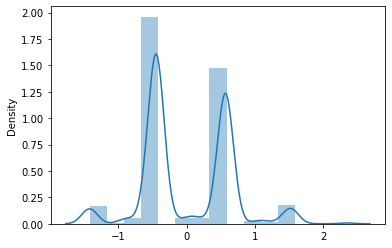

In [ ]:
sns.distplot(Residual, bins =15)


**Making Predictions:**

In [ ]:
y_test = df_test.pop('Rating')
X_test = df_test

In [ ]:
final_cols = X1.columns

In [ ]:
X_test_model= X_test[final_cols]
X_test_model.head()

,Operator_MTNL,Call Drop Category_Satisfactory,State Name_Bihar,State Name_Delhi,State Name_Goa,State Name_Himachal Pradesh,State Name_Kashmir,State Name_Madhya Pradesh,State Name_Nagaland,State Name_Uttarakhand
1586,0,0,0,0,0,0,0,0,0,0
7519,0,1,0,0,0,0,0,0,0,0
3541,0,1,0,0,0,0,0,0,0,0
1074,0,0,0,0,0,0,0,0,0,0
8663,0,1,0,0,0,0,0,0,0,0


In [ ]:
X_test_sm = sm.add_constant(X_test_model)

In [ ]:
y_pred = lr_1.predict(X_test_sm)

In [ ]:
y_pred.head()

1586    1.473549
7519    4.423815
3541    4.423815
1074    1.473549
8663    4.423815
dtype: float64

Text(0, 0.5, 'y_pred')

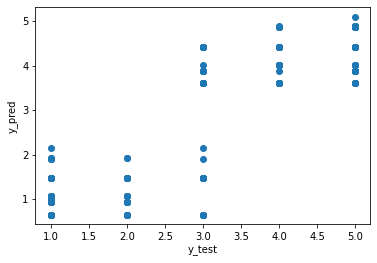

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

In [ ]:
r_squ = r2_score(y_test,y_pred)
r_squ

0.8111644566221954

In [ ]:
# Repeat Naive Bayes modeling
from sklearn.naive_bayes import MultinomialNB

#Create a MultiNomial NB Classifier
nb = MultinomialNB()

#Train the model using the training sets
nb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = nb.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)
#tn, fp, fn, tp = 
#x=cf.ravel()
#print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)
#print(x)

Confusion Matrix
[[466   8  21  49  54]
 [144   9   6   7   6]
 [116   2  85  31  82]
 [  0   0   9 385 285]
 [  0   0  17 284 582]]


In [ ]:
cnf_matrix=cf

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [ ]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))
# Precision is defined as the number of true positives divided by the number of true positives plus the number of false positives. 

              precision    recall  f1-score   support

           1       0.64      0.78      0.70       598
           2       0.47      0.05      0.09       172
           3       0.62      0.27      0.37       316
           4       0.51      0.57      0.54       679
           5       0.58      0.66      0.62       883

    accuracy                           0.58      2648
   macro avg       0.56      0.47      0.46      2648
weighted avg       0.57      0.58      0.55      2648

